In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Pull the Dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [5]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (5,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

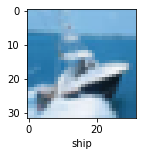

In [8]:
plot_sample(X_train, y_train, 8)


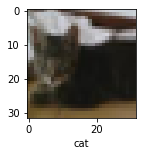

In [9]:
plot_sample(X_train, y_train, 9)

In [10]:
#Normalizing the training data
X_train = X_train / 255.0
#Normalizing the testing data to test it out later
X_test = X_test / 255.0

In [11]:
#Creating a ANN and training to 20 epochs - 20 mins expected 
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8087 - accuracy: 0.3558
Epoch 2/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6191 - accuracy: 0.4284
Epoch 3/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5416 - accuracy: 0.4563
Epoch 4/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4790 - accuracy: 0.4773
Epoch 5/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4280 - accuracy: 0.4975
Epoch 6/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3877 - accuracy: 0.5117
Epoch 7/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3490 - accuracy: 0.5262
Epoch 8/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3124 - accuracy: 0.5388
Epoch 9/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.2810 - accuracy: 0.5507
Epoch 10/20
1563/1563 [==============================] - 55s 35m

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.60      0.58      1000
           1       0.85      0.28      0.42      1000
           2       0.38      0.46      0.42      1000
           3       0.39      0.24      0.30      1000
           4       0.38      0.62      0.47      1000
           5       0.37      0.59      0.46      1000
           6       0.67      0.50      0.57      1000
           7       0.59      0.61      0.60      1000
           8       0.69      0.60      0.64      1000
           9       0.62      0.56      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.55      0.51      0.50     10000
weighted avg       0.55      0.51      0.50     10000



In [13]:
#Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4486 - accuracy: 0.4822
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1095 - accuracy: 0.6098
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9776 - accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8970 - accuracy: 0.6879
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8290 - accuracy: 0.7122
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7715 - accuracy: 0.7298
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7244 - accuracy: 0.7468
Epoch 8/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6798 - accuracy: 0.7632
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6381 - accuracy: 0.7770
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9070 - accuracy: 0.6946


[0.9070003628730774, 0.694599986076355]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[7.3620217e-04, 1.2810198e-03, 7.3131919e-04, 5.5123228e-01,
        1.9605078e-04, 4.3968463e-01, 1.8370501e-04, 6.1940606e-05,
        5.6761913e-03, 2.1669472e-04],
       [3.6052498e-04, 3.5507081e-03, 8.4341406e-07, 2.8041809e-09,
        3.9204874e-08, 5.0772143e-12, 7.9045145e-11, 1.3968626e-10,
        9.9602306e-01, 6.4885426e-05],
       [1.4310658e-01, 1.2540577e-01, 3.4829464e-03, 9.5810485e-04,
        3.7842555e-04, 3.5119861e-05, 1.8033797e-05, 5.4699933e-04,
        6.8048853e-01, 4.5579433e-02],
       [7.8021348e-01, 3.9917808e-03, 1.0073980e-01, 3.3106459e-03,
        9.6719123e-02, 6.3160718e-05, 1.1370442e-03, 9.6190963e-03,
        4.0239235e-03, 1.8206035e-04],
       [1.1553936e-07, 2.1394160e-05, 1.8392062e-02, 1.3598639e-02,
        3.7090874e-01, 1.2692423e-03, 5.9579402e-01, 7.8997309e-06,
        5.1632010e-06, 2.6911184e-06]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

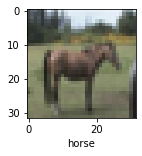

In [20]:
plot_sample(X_test, y_test,-1)

In [21]:
classes[y_classes[5]]

'frog'

In [22]:
classes[y_classes[9]]

'automobile'